In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [12]:
plt.style.use("default")
plt.rcParams.update({"font.size" : 22})

Read in csv file

In [2]:
MA_df_months = pd.read_csv("Data/AssemblyValues/MA_df_months.csv")

In [7]:
print(type(list(MA_df_months["MAs"])[0]))

<class 'str'>


MAs by time periods - only MAs in a given time period are shown

Text(0.5, 0, 'MA')

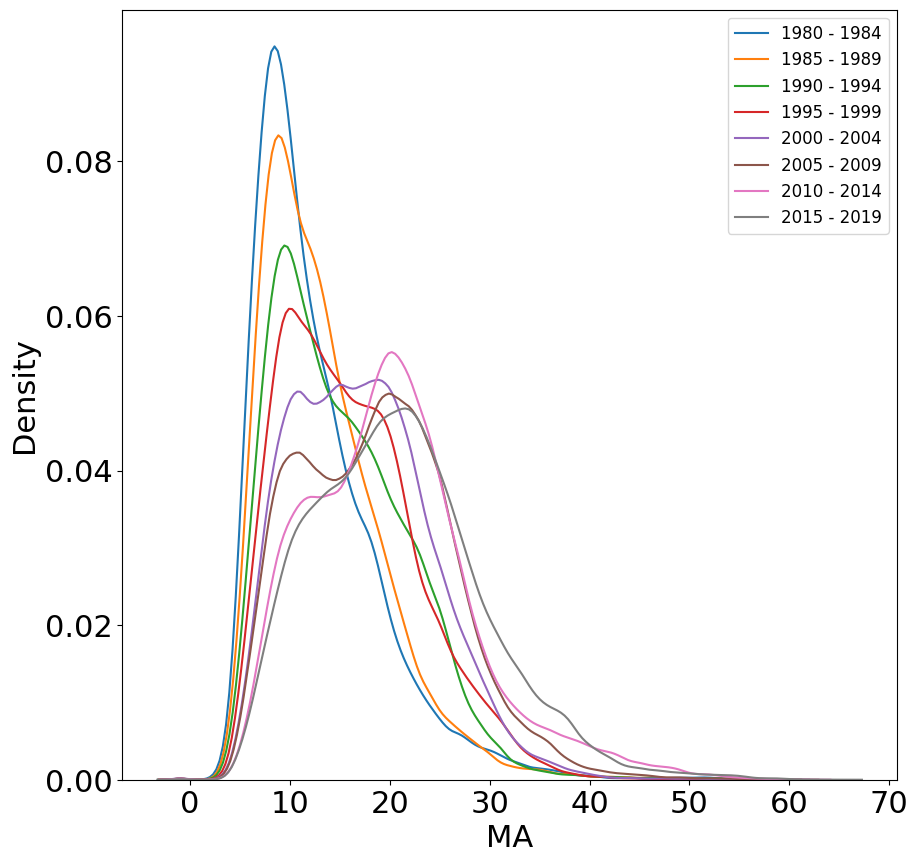

In [13]:
plt.figure(figsize=(10,10))

for times in [("1980", "1984"), ("1985", "1989"), ("1990", "1994"), ("1995", "1999"), ("2000", "2004"), 
              ("2005", "2009"), ("2010", "2014"), ("2015","2019")]:
    sub_df = MA_df_months[MA_df_months["month"] > times[0]]
    sub_df = sub_df[sub_df["month"] <= times[1]]

    #Converting strings to lists from csv file
    MA_strings = list(sub_df["MAs"])
    all_MAs = []
    for MAs in MA_strings:
        all_MAs.append(ast.literal_eval(MAs))
    sub_MAs = [MA for sublist in all_MAs for MA in sublist]

    sns.kdeplot(sub_MAs, label=str(times[0]) + " - " + str(times[1]))

plt.legend(prop={"size":12})
plt.xlabel("MA")

Cumulative MAs up to a given time

Text(0.5, 0, 'MA')

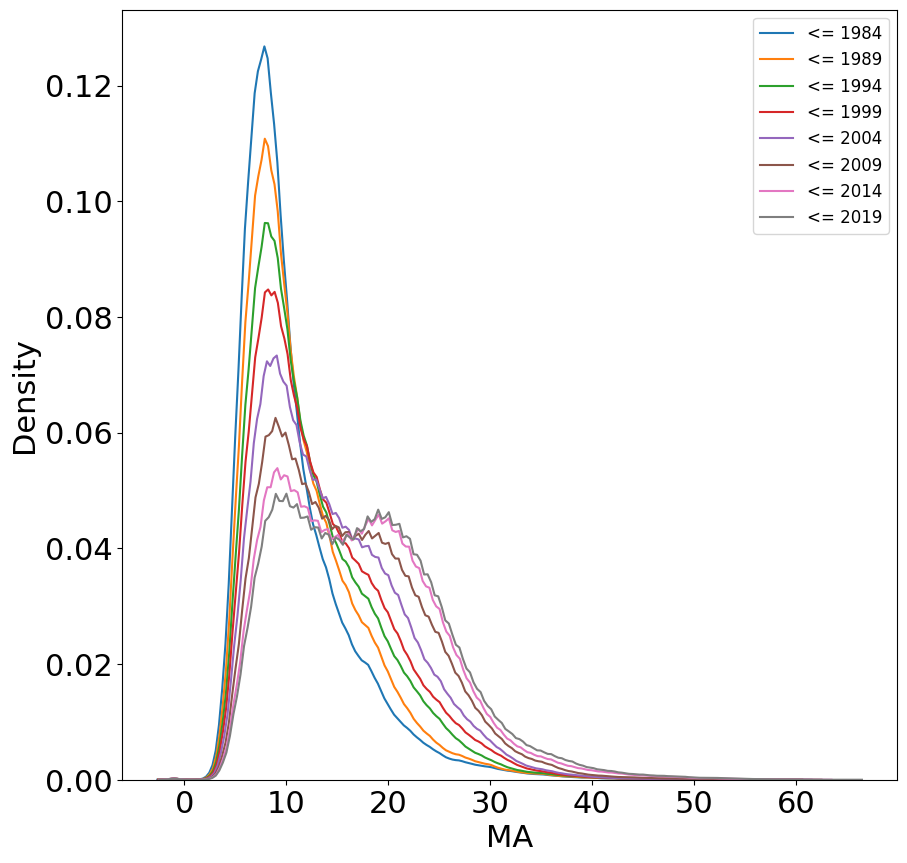

In [15]:
plt.figure(figsize=(10,10))

for times in [("1980", "1984"), ("1985", "1989"), ("1990", "1994"), ("1995", "1999"), ("2000", "2004"), 
              ("2005", "2009"), ("2010", "2014"), ("2015","2019")]:    
    sub_df = MA_df_months[MA_df_months["month"] <= times[1]]

    #Converting strings to lists from csv file
    MA_strings = list(sub_df["MAs"])
    all_MAs = []
    for MAs in MA_strings:
        all_MAs.append(ast.literal_eval(MAs))
    sub_MAs = [MA for sublist in all_MAs for MA in sublist]

    sns.kdeplot(sub_MAs, label="<= " + str(times[1]))

plt.legend(prop={"size":12})
plt.xlabel("MA")